In [23]:
import numpy as np
import keras
import matplotlib 
import matplotlib.pyplot as plt

from keras import models
from keras import layers

In [24]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [25]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

Data Preparation 

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):   #creates a matrix of shape (len(sequences) , dimension) 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.      
    return results

Divide data into Training and Test sets 

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

**1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.**

In [11]:
#Building model with 2, 3 layers

model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [12]:
#Compling the models

model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [13]:
# Seperating validation sets from training set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# Since the validation sets are created its time to train the models
history_2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5210 - accuracy: 0.7722 - val_loss: 0.3906 - val_accuracy: 0.8756
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3149 - accuracy: 0.9029 - val_loss: 0.3180 - val_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2322 - accuracy: 0.9285 - val_loss: 0.3104 - val_accuracy: 0.8744
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1827 - accuracy: 0.9448 - val_loss: 0.2780 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1523 - accuracy: 0.9522 - val_loss: 0.2866 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1263 - accuracy: 0.9615 - val_loss: 0.3215 - val_accuracy: 0.8761
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1056 - accuracy: 0.9690 - val_loss: 0.3622 - val_accuracy: 0.8666
Epoch 8/20
30

In [15]:
history_3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5182 - accuracy: 0.7899 - val_loss: 0.3763 - val_accuracy: 0.8757
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2944 - accuracy: 0.9076 - val_loss: 0.3155 - val_accuracy: 0.8784
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2119 - accuracy: 0.9303 - val_loss: 0.2765 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1649 - accuracy: 0.9461 - val_loss: 0.3049 - val_accuracy: 0.8788
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1330 - accuracy: 0.9565 - val_loss: 0.2888 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1065 - accuracy: 0.9659 - val_loss: 0.3492 - val_accuracy: 0.8760
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0890 - accuracy: 0.9727 - val_loss: 0.3403 - val_accuracy: 0.8816
Epoch 8/20
30

In [16]:
model_2.summary()
history_dict_2 = history_2.history
history_dict_2.keys()

model_3.summary()
history_dict_3 = history_3.history
history_dict_3.keys()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)            

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the losses

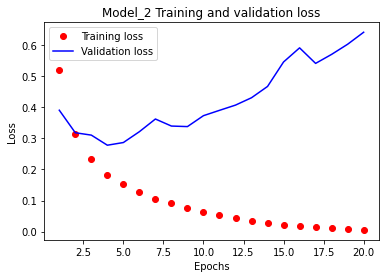

In [17]:
#Model_2 Losses
history_dict_2 = history_2.history
loss_values = history_dict_2["loss"]
val_loss_values = history_dict_2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Model_2 Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

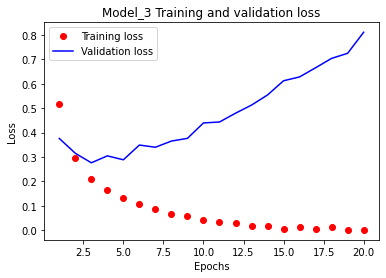

In [18]:
#Model_3 Losses
history_dict_3 = history_3.history
loss_values = history_dict_3["loss"]
val_loss_values = history_dict_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Model_3 Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the accuracies

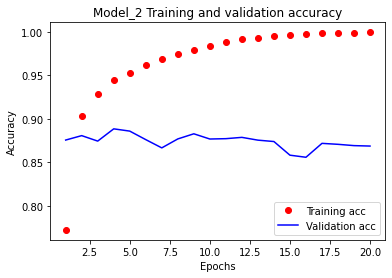

In [19]:
#Model_2 Accuracies
fig = plt.figure()
acc = history_dict_2["accuracy"]
val_acc = history_dict_2["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Model_2 Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

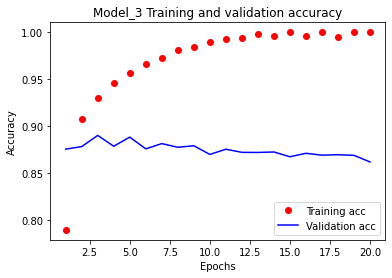

In [20]:
#Model_3 Accuracies
fig = plt.figure()
acc = history_dict_3["accuracy"]
val_acc = history_dict_3["val_accuracy"]
plt.plot(epochs, acc, "ro", label = "Training acc") 
plt.plot(epochs, val_acc , "b", label = "Validation acc")
plt.title("Model_3 Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
history_2 = model_2.fit(x_test, y_test, epochs=7,
                    batch_size=512, validation_data=(x_test, y_test))
results = model_2.evaluate(x_test, y_test)
results

Epoch 1/7
49/49 [==============================] - 3s 54ms/step - loss: 0.4727 - accuracy: 0.8605 - val_loss: 0.2696 - val_accuracy: 0.8927
Epoch 2/7
49/49 [==============================] - 2s 42ms/step - loss: 0.2614 - accuracy: 0.8972 - val_loss: 0.2062 - val_accuracy: 0.9220
Epoch 3/7
49/49 [==============================] - 2s 42ms/step - loss: 0.2071 - accuracy: 0.9183 - val_loss: 0.1636 - val_accuracy: 0.9419
Epoch 4/7
49/49 [==============================] - 2s 43ms/step - loss: 0.1682 - accuracy: 0.9357 - val_loss: 0.1368 - val_accuracy: 0.9506
Epoch 5/7
49/49 [==============================] - 2s 43ms/step - loss: 0.1377 - accuracy: 0.9493 - val_loss: 0.1057 - val_accuracy: 0.9658
Epoch 6/7
49/49 [==============================] - 2s 43ms/step - loss: 0.1124 - accuracy: 0.9594 - val_loss: 0.0837 - val_accuracy: 0.9742
Epoch 7/7
782/782 [==============================] - 2s 2ms/step - loss: 0.0668 - accuracy: 0.9815


[0.06681840121746063, 0.9814800024032593]

In [22]:
history_3 = model_3.fit(x_test, y_test, epochs=7,
                    batch_size=512, validation_data=(x_test, y_test))
results = model_3.evaluate(x_test, y_test)
results

Epoch 1/7
49/49 [==============================] - 3s 57ms/step - loss: 0.5425 - accuracy: 0.8592 - val_loss: 0.2625 - val_accuracy: 0.9030
Epoch 2/7
49/49 [==============================] - 2s 44ms/step - loss: 0.2579 - accuracy: 0.9016 - val_loss: 0.1893 - val_accuracy: 0.9319
Epoch 3/7
49/49 [==============================] - 2s 44ms/step - loss: 0.2016 - accuracy: 0.9241 - val_loss: 0.1595 - val_accuracy: 0.9423
Epoch 4/7
49/49 [==============================] - 2s 42ms/step - loss: 0.1522 - accuracy: 0.9440 - val_loss: 0.1449 - val_accuracy: 0.9421
Epoch 5/7
49/49 [==============================] - 2s 43ms/step - loss: 0.1197 - accuracy: 0.9560 - val_loss: 0.0800 - val_accuracy: 0.9756
Epoch 6/7
49/49 [==============================] - 2s 43ms/step - loss: 0.0900 - accuracy: 0.9688 - val_loss: 0.0573 - val_accuracy: 0.9844
Epoch 7/7
782/782 [==============================] - 2s 3ms/step - loss: 0.0509 - accuracy: 0.9853


[0.05090346187353134, 0.985319972038269]

**Affects**
      
    
When the number of hidden layers is reduced, it has a direct impact on the network's accuracy because, when faced with a challenging problem, a network with fewer hidden layers may not be able to be trained effectively. Techniques that used less than three hidden layers struggled from a loss of accuracy, whereas architectures that used more than three hidden layers were shown to be inefficient in terms of time complexity.Techniques that used fewer than three hidden layers suffered from a loss of accuracy, whereas architectures that used more than three hidden layers were shown to be inefficient in terms of time complexity.

**2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so 
on**

In [26]:
model_2h = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")])

model_2h.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_2h = model_2h.fit(x_train, y_train, epochs=20, batch_size=512 , validation_data=(x_val, y_val))
results = model_2h.evaluate(x_val, y_val)

Epoch 1/20
49/49 [==============================] - 3s 48ms/step - loss: 0.4271 - accuracy: 0.8220 - val_loss: 0.2566 - val_accuracy: 0.9124
Epoch 2/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2402 - accuracy: 0.9122 - val_loss: 0.1772 - val_accuracy: 0.9427
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1881 - accuracy: 0.9298 - val_loss: 0.1385 - val_accuracy: 0.9566
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1577 - accuracy: 0.9418 - val_loss: 0.1289 - val_accuracy: 0.9571
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1320 - accuracy: 0.9528 - val_loss: 0.0949 - val_accuracy: 0.9711
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1147 - accuracy: 0.9586 - val_loss: 0.0851 - val_accuracy: 0.9738
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.0970 - accuracy: 0.9658 - val_loss: 0.0673 - val_accuracy: 0.9821
Epoch 8/20
49

In [27]:
results

[0.24918024241924286, 0.9150999784469604]

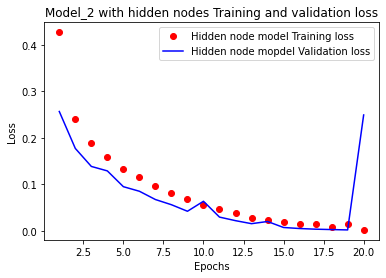

In [28]:
history_dict_2h = history_2h.history
loss_values = history_dict_2h["loss"]
val_loss_values = history_dict_2h["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro",label="Hidden node model Training loss") 
plt.plot(epochs, val_loss_values, "b",label="Hidden node mopdel Validation loss") 
plt.title("Model_2 with hidden nodes Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

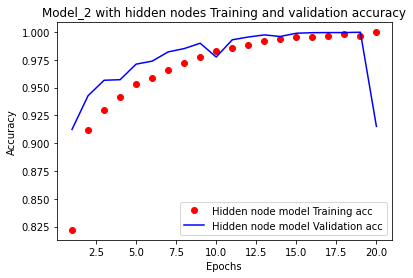

In [29]:
#fig = plt.figure()
acc = history_dict_2h["accuracy"]
val_acc = history_dict_2h["val_accuracy"]
plt.plot(epochs, acc, "ro", label = "Hidden node model Training acc") 
plt.plot(epochs, val_acc , "b", label = "Hidden node model Validation acc")
plt.title("Model_2 with hidden nodes Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [30]:
history_2h = model_2h.fit(x_test, y_test, epochs=7,
                    batch_size=512, validation_data=(x_test, y_test))
results = model_2h.evaluate(x_test, y_test)
results

Epoch 1/7
49/49 [==============================] - 3s 60ms/step - loss: 0.4867 - accuracy: 0.8560 - val_loss: 0.2596 - val_accuracy: 0.8994
Epoch 2/7
49/49 [==============================] - 3s 51ms/step - loss: 0.2544 - accuracy: 0.9013 - val_loss: 0.1882 - val_accuracy: 0.9304
Epoch 3/7
49/49 [==============================] - 2s 50ms/step - loss: 0.1950 - accuracy: 0.9243 - val_loss: 0.1465 - val_accuracy: 0.9491
Epoch 4/7
49/49 [==============================] - 2s 50ms/step - loss: 0.1515 - accuracy: 0.9431 - val_loss: 0.1128 - val_accuracy: 0.9633
Epoch 5/7
49/49 [==============================] - 2s 51ms/step - loss: 0.1192 - accuracy: 0.9564 - val_loss: 0.0988 - val_accuracy: 0.9655
Epoch 6/7
49/49 [==============================] - 2s 51ms/step - loss: 0.0932 - accuracy: 0.9667 - val_loss: 0.0727 - val_accuracy: 0.9772
Epoch 7/7
782/782 [==============================] - 2s 3ms/step - loss: 0.0531 - accuracy: 0.9832


[0.05307464301586151, 0.9832000136375427]

**If we use less no of hidden units, we will get high training error and high generalization error due to underfitting.
If we use high no of hidden units, we will get low training error but still have high generalization error due to overfitting.**

**3.Try using the mse loss function instead of binary_crossentropy.**

In [31]:
model_2m = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")])

model_2m.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_2m = model_2m.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model_2m.evaluate(x_val, y_val)

Epoch 1/20
30/30 [==============================] - 3s 48ms/step - loss: 0.1700 - accuracy: 0.7842 - val_loss: 0.1186 - val_accuracy: 0.8726
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0918 - accuracy: 0.9069 - val_loss: 0.1001 - val_accuracy: 0.8750
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0661 - accuracy: 0.9303 - val_loss: 0.0851 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0502 - accuracy: 0.9501 - val_loss: 0.0826 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0411 - accuracy: 0.9575 - val_loss: 0.0827 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0332 - accuracy: 0.9667 - val_loss: 0.0863 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0273 - accuracy: 0.9733 - val_loss: 0.0855 - val_accuracy: 0.8835
Epoch 8/20
30

In [32]:
results

[0.10782164335250854, 0.8658999800682068]

**Plot the losses and accurcies**

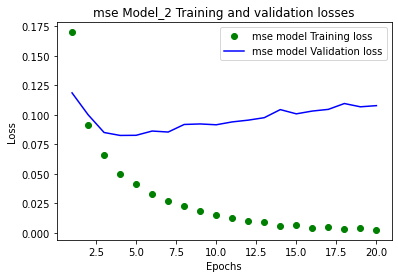

In [34]:
#Plot the losses

history_dict_2m = history_2m.history
loss_values = history_dict_2m["loss"]
val_loss_values = history_dict_2m["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go",label="mse model Training loss") 
plt.plot(epochs, val_loss_values, "b",label="mse model Validation loss") 
plt.title("mse Model_2 Training and validation losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

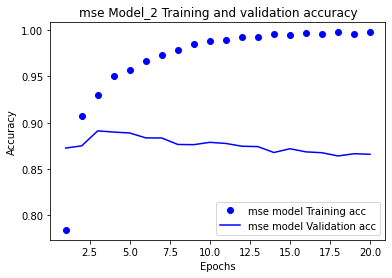

In [35]:
#Plot the accuracy
acc = history_dict_2m["accuracy"]
val_acc = history_dict_2m["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "mse model Training acc") 
plt.plot(epochs, val_acc , "b", label = "mse model Validation acc")
plt.title("mse Model_2 Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
history_2m = model_2m.fit(x_test, y_test, epochs=7,
                    batch_size=512, validation_data=(x_test, y_test))
results = model_2m.evaluate(x_test, y_test)
results

Epoch 1/7
49/49 [==============================] - 3s 52ms/step - loss: 0.1103 - accuracy: 0.8640 - val_loss: 0.0790 - val_accuracy: 0.9040
Epoch 2/7
49/49 [==============================] - 2s 43ms/step - loss: 0.0762 - accuracy: 0.9073 - val_loss: 0.0593 - val_accuracy: 0.9315
Epoch 3/7
49/49 [==============================] - 2s 43ms/step - loss: 0.0600 - accuracy: 0.9296 - val_loss: 0.0515 - val_accuracy: 0.9408
Epoch 4/7
49/49 [==============================] - 2s 43ms/step - loss: 0.0493 - accuracy: 0.9436 - val_loss: 0.0384 - val_accuracy: 0.9593
Epoch 5/7
49/49 [==============================] - 2s 45ms/step - loss: 0.0404 - accuracy: 0.9558 - val_loss: 0.0336 - val_accuracy: 0.9650
Epoch 6/7
49/49 [==============================] - 2s 43ms/step - loss: 0.0342 - accuracy: 0.9638 - val_loss: 0.0269 - val_accuracy: 0.9721
Epoch 7/7
782/782 [==============================] - 2s 3ms/step - loss: 0.0241 - accuracy: 0.9758


[0.02406742423772812, 0.9757999777793884]

**4. Try using the tanh activation (an activation that was popular in the early days of neural 
networks) instead of relu.**

In [37]:
model_2t = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")])

model_2t.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_2t = model_2t.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.4946 - accuracy: 0.8003 - val_loss: 0.3748 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2928 - accuracy: 0.9054 - val_loss: 0.2995 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2066 - accuracy: 0.9343 - val_loss: 0.3101 - val_accuracy: 0.8709
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1560 - accuracy: 0.9485 - val_loss: 0.2930 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1204 - accuracy: 0.9607 - val_loss: 0.2920 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0923 - accuracy: 0.9720 - val_loss: 0.3243 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0745 - accuracy: 0.9775 - val_loss: 0.3664 - val_accuracy: 0.8787
Epoch 8/20
30

In [38]:
results = model_2t.evaluate(x_val, y_val)
results

313/313 [==============================] - 1s 3ms/step - loss: 0.8229 - accuracy: 0.8621


[0.8229233622550964, 0.8621000051498413]

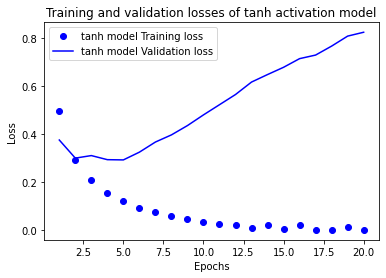

In [39]:
#Tanh activation model losses
history_dict_2t = history_2t.history
loss_values = history_dict_2t["loss"]
val_loss_values = history_dict_2t["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo",label="tanh model Training loss") 
plt.plot(epochs, val_loss_values, "b",label="tanh model Validation loss") 
plt.title("Training and validation losses of tanh activation model" )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

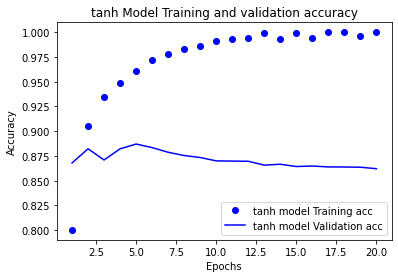

In [40]:
#tanh activation model Accuracies
acc = history_dict_2t["accuracy"]
val_acc = history_dict_2t["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "tanh model Training acc") 
plt.plot(epochs, val_acc , "b", label = "tanh model Validation acc")
plt.title("tanh Model Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
history_2t = model_2t.fit(x_test, y_test, epochs=7,
                    batch_size=512, validation_data=(x_test, y_test))
results = model_2t.evaluate(x_test, y_test)
results

Epoch 1/7
49/49 [==============================] - 3s 53ms/step - loss: 0.6176 - accuracy: 0.8578 - val_loss: 0.2821 - val_accuracy: 0.8978
Epoch 2/7
49/49 [==============================] - 2s 43ms/step - loss: 0.2687 - accuracy: 0.8984 - val_loss: 0.2113 - val_accuracy: 0.9202
Epoch 3/7
49/49 [==============================] - 2s 42ms/step - loss: 0.2133 - accuracy: 0.9191 - val_loss: 0.1671 - val_accuracy: 0.9405
Epoch 4/7
49/49 [==============================] - 2s 43ms/step - loss: 0.1736 - accuracy: 0.9344 - val_loss: 0.1343 - val_accuracy: 0.9531
Epoch 5/7
49/49 [==============================] - 2s 43ms/step - loss: 0.1450 - accuracy: 0.9442 - val_loss: 0.1077 - val_accuracy: 0.9632
Epoch 6/7
49/49 [==============================] - 2s 44ms/step - loss: 0.1218 - accuracy: 0.9551 - val_loss: 0.0886 - val_accuracy: 0.9706
Epoch 7/7
782/782 [==============================] - 2s 2ms/step - loss: 0.0744 - accuracy: 0.9766


[0.07444517314434052, 0.9765999913215637]

**5.Use any technique we studied in class, and these include regularization, dropout, etc., to 
get your model to perform better on validation.**

**Dropout**

In [42]:
from tensorflow.keras import regularizers
model_dropout = keras.Sequential([layers.Dense(20, activation = "relu"),
                                  layers.Dropout(0.2),
                                  layers.Dense(15, activation = "relu"),
                                  layers.Dropout(0.2),
                                  layers.Dense(1, activation = "sigmoid")])

In [43]:
#Compling the model
model_dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model_dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5328 - accuracy: 0.7569 - val_loss: 0.3984 - val_accuracy: 0.8623
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3557 - accuracy: 0.8733 - val_loss: 0.3064 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2672 - accuracy: 0.9065 - val_loss: 0.3036 - val_accuracy: 0.8796
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2133 - accuracy: 0.9249 - val_loss: 0.2854 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1763 - accuracy: 0.9393 - val_loss: 0.2795 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1433 - accuracy: 0.9527 - val_loss: 0.3392 - val_accuracy: 0.8743
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1186 - accuracy: 0.9637 - val_loss: 0.3100 - val_accuracy: 0.8841
Epoch 8/20
30

In [44]:
results = model_dropout.evaluate(x_val, y_val)
results

313/313 [==============================] - 1s 3ms/step - loss: 0.7609 - accuracy: 0.8734


[0.7609493732452393, 0.8733999729156494]

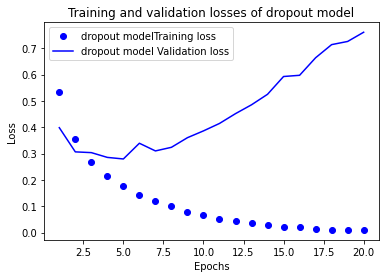

In [45]:
#Training and validation losses of Dropout model
history_dict_dropout = history_dropout.history
loss_values = history_dict_dropout["loss"]
val_loss_values = history_dict_dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo",label="dropout modelTraining loss") 
plt.plot(epochs, val_loss_values, "b",label="dropout model Validation loss") 
plt.title("Training and validation losses of dropout model" )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

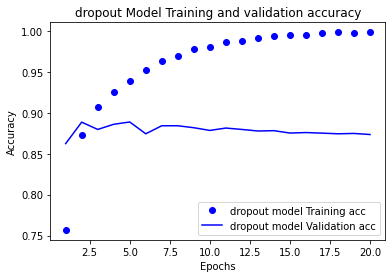

In [46]:
#Training and Validation Accuracies for dropout model
acc = history_dict_dropout["accuracy"]
val_acc = history_dict_dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "dropout model Training acc") 
plt.plot(epochs, val_acc , "b", label = "dropout model Validation acc")
plt.title("dropout Model Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [48]:
history_dropout = model_dropout.fit(x_test, y_test, epochs = 7,
                    batch_size=512, validation_data=(x_val, y_val))
results = model_dropout.evaluate(x_test , y_test)
results

Epoch 1/7
49/49 [==============================] - 2s 46ms/step - loss: 0.3920 - accuracy: 0.8576 - val_loss: 0.3058 - val_accuracy: 0.8774
Epoch 2/7
49/49 [==============================] - 2s 40ms/step - loss: 0.2716 - accuracy: 0.8940 - val_loss: 0.2994 - val_accuracy: 0.8853
Epoch 3/7
49/49 [==============================] - 2s 40ms/step - loss: 0.2199 - accuracy: 0.9181 - val_loss: 0.3100 - val_accuracy: 0.8847
Epoch 4/7
49/49 [==============================] - 2s 42ms/step - loss: 0.1802 - accuracy: 0.9348 - val_loss: 0.3236 - val_accuracy: 0.8882
Epoch 5/7
49/49 [==============================] - 2s 41ms/step - loss: 0.1510 - accuracy: 0.9462 - val_loss: 0.3526 - val_accuracy: 0.8884
Epoch 6/7
49/49 [==============================] - 2s 40ms/step - loss: 0.1278 - accuracy: 0.9560 - val_loss: 0.3843 - val_accuracy: 0.8884
Epoch 7/7
782/782 [==============================] - 2s 3ms/step - loss: 0.0741 - accuracy: 0.9764


[0.07406830042600632, 0.9764000177383423]